In [2]:
cd .. 

/home/philippjfr/topographica


In [3]:
import external
import topo
import imagen as ig
import numpy as np
import holoviews as hv
%reload_ext holoviews.ipython

In [27]:
from featuremapper.analysis import spatialtuning
reload(spatialtuning)

<module 'featuremapper.analysis.spatialtuning' from '/home/philippjfr/topographica/external/featuremapper/featuremapper/analysis/spatialtuning.py'>

In [28]:
from featuremapper.analysis.spatialtuning import SizeTuningPeaks, Size_iDoGModel, Size_DivDoGModel, SF_DoGModel, Solomon_DoGModel

In [5]:
import topo
from topo.analysis import Collector
from topo.submodel.earlycalibrated import ModelCalibratedLGN
from topo.submodel.gcal import ArraySpec
from topo.submodel.scal import ModelSCAL

from topo.command import runscript  # In order to check the model files load correctly
from featuremapper.command import measure_size_response, measure_frequency_response, measure_response
from featuremapper.analysis.spatialtuning import SizeTuningPeaks, Size_iDoGModel, Size_DivDoGModel, SF_DoGModel
from topo.misc.lancext import RunBatchCommand, topo_metadata

creating /tmp/scipy-philippjfr-XzUS0Y/python27_intermediate/compiler_ede35212078c0beff706e86697d62e7e


/home/philippjfr/miniconda/envs/science/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [8]:
topo.sim.model = ModelSCAL(area=2.0, num_inputs=1.5)
scal = topo.sim.model.specification
scal()

In [6]:
topo.sim.model = ModelCalibratedLGN(area=2.0, num_inputs=1)
scal = topo.sim.model.specification
scal()

:HoloMap   [Time]
   :Image   [x,y]   (z)
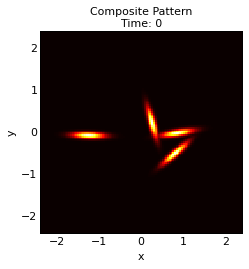
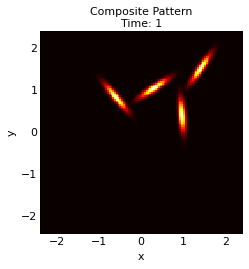
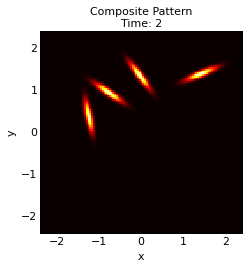
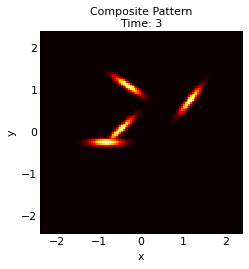
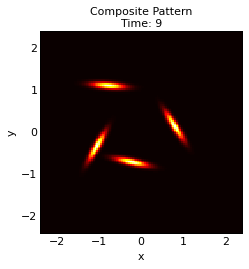
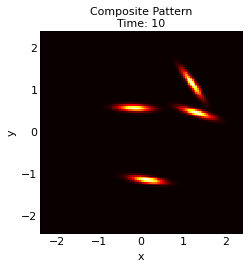

In [9]:
topo.sim.Retina.input_generator.anim(10)

In [6]:
%opts GridSpace [shared_xaxis=True shared_yaxis=True]

:Layout
   .CF_Weight.LateralGC :CFView   [x,y]   (z)
   .CF_Weight.Afferent  :CFView   [x,y]   (z)
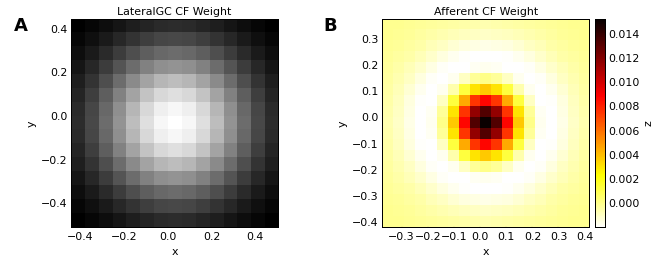

In [7]:
%%opts CFView {+axiswise} CFView.CF_Weight.Afferent (cmap='hot_r') [colorbar=True]
topo.sim.LGNOn.LateralGC.grid(3,3)[0,0].last + topo.sim.LGNOn.Afferent.grid(3,3)[0,0].last

In [7]:
size_response = measure_size_response(outputs=['LGNOn'],num_sizes=21, 
                                      contrasts=[10, 30, 70], max_size=2, durations=[0.15])

100% measurement progress 00:03:40

In [31]:
from scipy.integrate import quad

In [80]:
import sympy

In [218]:
r= sympy.Symbol('r')
a= sympy.Symbol('a')

In [222]:
from sympy import E, exp

In [90]:
theta = sympy.Symbol('theta')

In [225]:
E??

In [227]:
sympy.integrate(r*exp(-(r**2/a)), r)

-a*exp(-r**2/a)/2

In [230]:
sympy.integrate(sympy.integrate(r*E**(-(r**2/a)), r), theta)

-a*theta*exp(-r**2/a)/2

In [259]:
xs = np.linspace(0,1,51)
cntr = lambda x: (1--a*np.exp(-x**2/a)/2)
surr = lambda x: (1--b*np.exp(-x**2/b)/2)
#cntr = lambda x: x*np.e**-(x**2/a)
#surr = lambda x: x*np.e**-(x**2/b)
a=0.2
b=0.5

In [260]:
cntr = lambda d, a: (1-np.exp(-(2*d/a)**2))
surr = lambda d: (1-np.exp(-(2*d/b)**2))


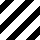
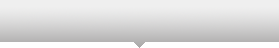
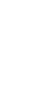
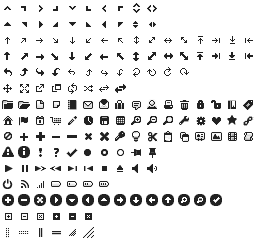
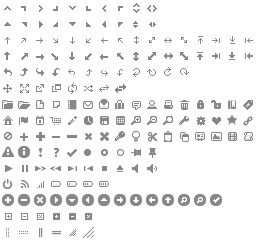
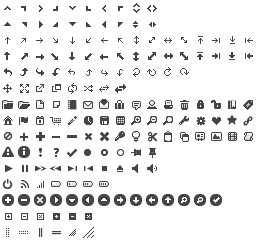
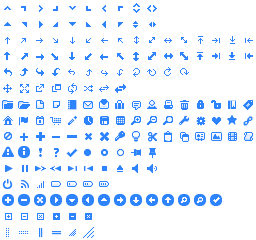
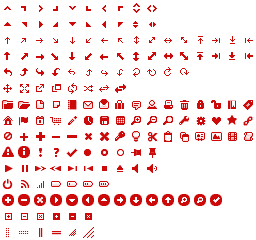
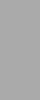
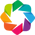
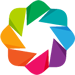
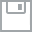
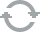
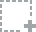
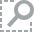
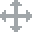
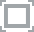
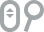

:HoloMap   [$K_c$,$K_s$,Center,Multiplier]
   :Curve   [x]   (y)

In [274]:
%%output backend='bokeh' widgets='live' max_frames=1000
%%opts Curve (color=Palette('hot'))

hv.HoloMap({(K_c, K_s, a, b): hv.Curve((xs, K_c*cntr(xs, a) / (1 + K_s*cntr(xs, a*b))))
              for a in np.linspace(0.1, 1, 6) for b in np.linspace(1.2, 2, 5)
             for K_c in np.linspace(0, 3, 5) for K_s in np.linspace(0, 2, 5)},
             kdims=['$K_c$', '$K_s$', 'Center', 'Multiplier'])

In [ ]:
c

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
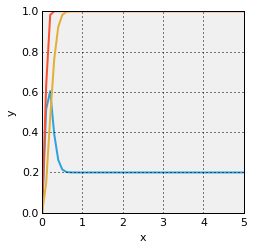

In [238]:
hv.Curve((xs, cntr(xs)-0.8*surr(xs))) * hv.Curve((xs, cntr(xs))) * hv.Curve((xs, surr(xs)))

In [ ]:
sympy.integrate()

In [ ]:
import

:Curve   [x]   (y)
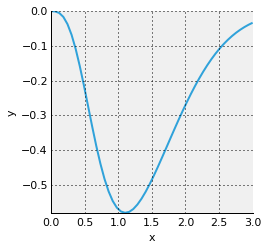

In [74]:
hv.Curve([(i, ) for i in np.linspace(0, 3, 50)])

Size_DivDoGModel(size_response.SizeTuning.LGNOn.sample([(0,0)]).to.curve(['Size'], ['Response'])).map(lambda x: x.reindex(), [hv.HoloMap])

In [23]:
Solomon_DoGModel(size_response.SizeTuning.LGNOn.sample([(0,0)]).to.curve(['Size'], ['Response'])).map(lambda x: x.reindex(), [hv.HoloMap])

:Layout
   .Overlay.I                :HoloMap   [Contrast]
      :Overlay
         .SizeTuning_Response.I    :Curve   [Size]   (Response)
         .Response.Size_Tuning_Fit :Curve   [Size]   (Response)
   .ItemTable.IDoG_Model_Fit :HoloMap   [Contrast]
      :ItemTable   (a,b,R_0,K_s,SI,Peak,K_c)

:Layout
   .Overlay.I                :HoloMap   [Contrast]
      :Overlay
         .SizeTuning_Response.I    :Curve   [Size]   (Response)
         .Response.Size_Tuning_Fit :Curve   [Size]   (Response)
   .ItemTable.IDoG_Model_Fit :HoloMap   [Contrast]
      :ItemTable   (a,b,R_0,K_s,SI,Peak,K_c)
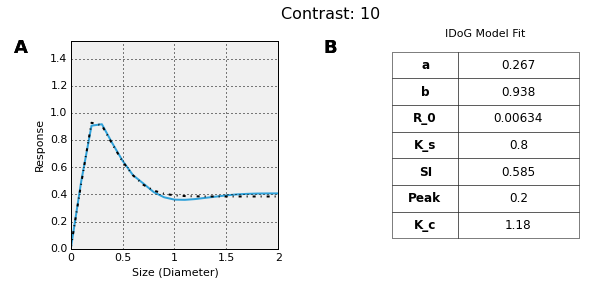
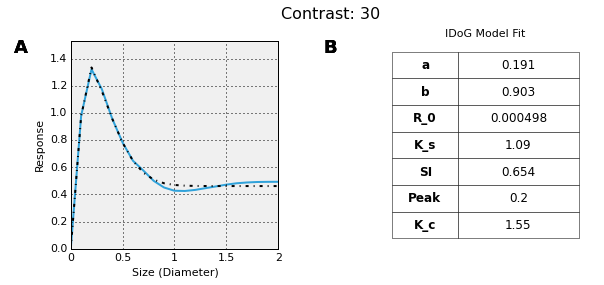

In [10]:
Size_iDoGModel(size_response.SizeTuning.LGNOn.sample([(0,0)]).to.curve(['Size'], ['Response'])).map(lambda x: x.reindex(), [hv.HoloMap])

In [19]:
freq_response = measure_frequency_response(outputs=['LGNOn'],num_freq=21, max_freq=6,
                                           contrasts=[10, 70, 100], size=1, durations=[0.15])

100% measurement progress 00:03:18


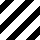
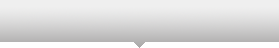
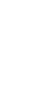
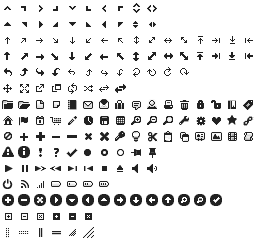
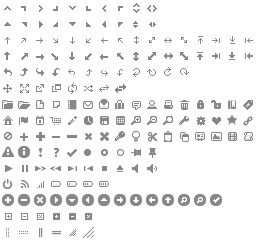
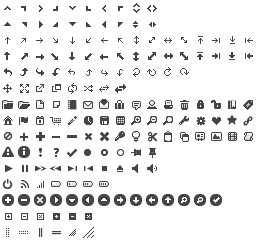
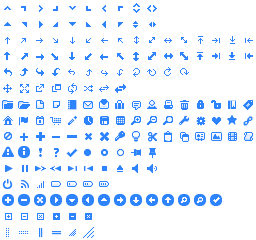
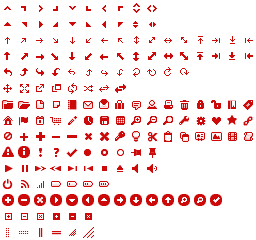
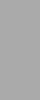
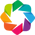
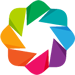
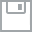
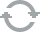
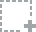
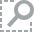
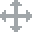
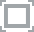
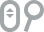

:HoloMap   [X,Y,Time,Duration,Contrast,Frequency]
   :Image   [x,y]   (Response)

In [20]:
%%output widgets='live' backend='bokeh'
freq_response.FrequencyTuning.LGNOn

:HoloMap   [X,Y,Time,Duration,Contrast,x,y]
   :Curve   [Frequency]   (Response)
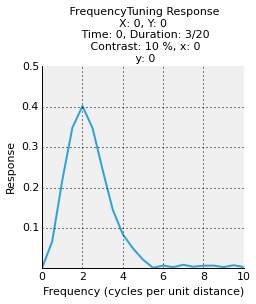
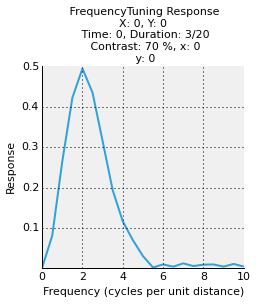
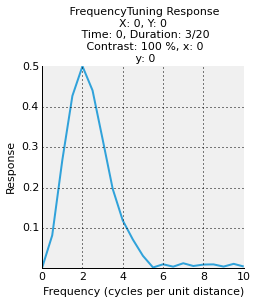

In [21]:
freq_response.FrequencyTuning.LGNOn.sample([(0,0)]).to.curve(['Frequency'], ['Response'])

In [53]:
topo.sim.run(2000)

In [74]:
from featuremapper.command import measure_or_pref
orpref = measure_or_pref(frequencies=[1.4])

100% measurement progress 00:00:14

:HoloMap   [Time,Duration]
   :Image   [x,y]   (Frequency Preference)
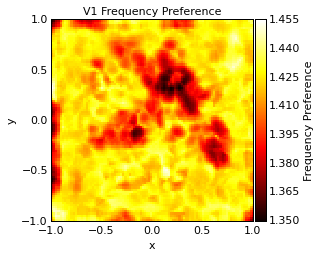

In [73]:
%%opts Image [colorbar=True]
orpref.FrequencyPreference.V1

In [75]:
orpref.OrientationPreference.V1 + orpref.OrientationPreference.V1 * orpref.OrientationSelectivity.V1

:Layout
   .Orientation_Preference.V1.I  :HoloMap   [Time,Duration]
      :Image   [x,y]   (Orientation Preference)
   .Orientation_Preference.V1.II :HoloMap   [Time,Duration]
      :Overlay
         .Orientation_Preference.V1  :Image   [x,y]   (Orientation Preference)
         .Orientation_Selectivity.V1 :Image   [x,y]   (Orientation Selectivity)


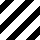
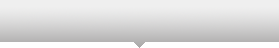
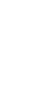
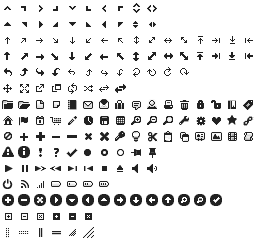
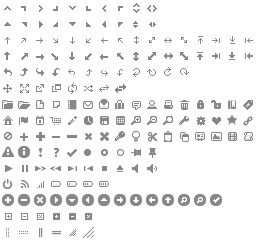
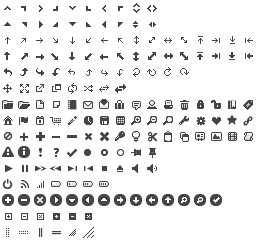
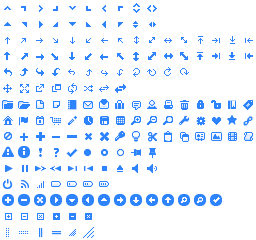
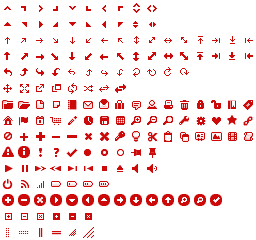
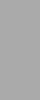
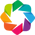
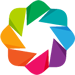
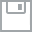
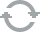
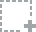
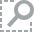
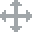
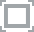
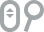

:Layout
   .Activity.Retina :Image   [x,y]   (z)
   .Activity.LGNOn  :Image   [x,y]   (z)
   .Activity.V1     :Image   [x,y]   (z)

In [111]:
%%output backend='bokeh'
topo.sim.run(1)
(topo.sim.Retina[:] +topo.sim.LGNOn[:] + topo.sim.V1[:]).cols(2)

:HoloMap   [Time]
   :CFView   [x,y]   (z)

In [76]:
topo.sim.V1.LGNOnAfferent.grid(5,5) * topo.sim.V1.LGNOffAfferent.grid(5,5)

:GridSpace   [X,Y]
   :HoloMap   [Time]
      :Overlay
         .CF_Weight.LGNOnAfferent  :CFView   [x,y]   (z)
         .CF_Weight.LGNOffAfferent :CFView   [x,y]   (z)